In [3]:
!wget https://www2.macs.hw.ac.uk/~js2001/data.csv --no-check-certificate

--2022-11-14 21:46:52--  https://www2.macs.hw.ac.uk/~js2001/data.csv
Resolving www2.macs.hw.ac.uk (www2.macs.hw.ac.uk)... 137.195.15.99
Connecting to www2.macs.hw.ac.uk (www2.macs.hw.ac.uk)|137.195.15.99|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 125204 (122K) [text/csv]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>] 122.27K   414KB/s    in 0.3s    

2022-11-14 21:46:53 (414 KB/s) - ‘data.csv.1’ saved [125204/125204]



Attribute Information:

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data
data = pd.read_csv('data.csv')
del data['Unnamed: 32']

In [5]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

we will use Keras and its packages

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [7]:
# Initialising the ANN
classifier = Sequential()

In [23]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=16, activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))

input_dim - number of columns of the dataset 

output_dim - number of outputs to be fed to the next layer, if any

activation - activation function which is ReLU in this case

init - the way in which weights should be provided to an ANN
 
The **ReLU** function is f(x)=max(0,x). Usually this is applied element-wise to the output of some other function, such as a matrix-vector product. In MLP usages, rectifier units replace all other activation functions except perhaps the readout layer. But I suppose you could mix-and-match them if you'd like. One way ReLUs improve neural networks is by speeding up training. The gradient computation is very simple (either 0 or 1 depending on the sign of x). Also, the computational step of a ReLU is easy: any negative elements are set to 0.0 -- no exponentials, no multiplication or division operations. Gradients of logistic and hyperbolic tangent networks are smaller than the positive portion of the ReLU. This means that the positive portion is updated more rapidly as training progresses. However, this comes at a cost. The 0 gradient on the left-hand side is has its own problem, called "dead neurons," in which a gradient update sets the incoming values to a ReLU such that the output is always zero; modified ReLU units such as ELU (or Leaky ReLU etc.) can minimize this. Source : [StackExchange](https://stats.stackexchange.com/questions/226923/why-do-we-use-relu-in-neural-networks-and-how-do-we-use-it)

In [29]:
# Adding the second hidden layer
classifier.add(Dense(units=16, activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))

In [30]:
# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [31]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Optimizer is chosen as adam for gradient descent.

Binary_crossentropy is the loss function used. 

Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0. [More about this](http://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)

In [34]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=100, epochs=150)
# Long scroll ahead but worth
# The batch size and number of epochs have been set using trial and error. Still looking for more efficient ways. Open to suggestions. 

Epoch 1/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 2/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 3/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 4/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 5/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 6/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 7/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 8/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 9/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 10/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 11/150
6/6 [===========

Batch size defines number of samples that going to be propagated through the network.

An Epoch is a complete pass through all the training data.

In [35]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 [==============================] - 0s 4ms/step


In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [37]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100)) #??????? 100%???????

Our accuracy is 100.0%


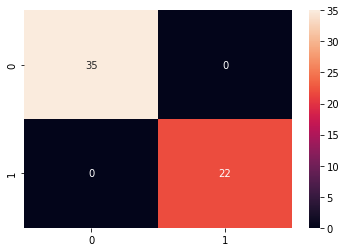

In [38]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')